In [1]:
!wget https://dcc.ligo.org/public/0165/P2000026/002/posterior_samples.h5

--2024-06-13 09:54:31--  https://dcc.ligo.org/public/0165/P2000026/002/posterior_samples.h5
Resolving dcc.ligo.org (dcc.ligo.org)... 131.215.125.144
Connecting to dcc.ligo.org (dcc.ligo.org)|131.215.125.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 693185569 (661M)
Saving to: ‘posterior_samples.h5’

posterior_samples.h 100%[===================>] 661.07M  70.0MB/s    in 9.5s    

2024-06-13 09:54:41 (69.8 MB/s) - ‘posterior_samples.h5’ saved [693185569/693185569]



In [1]:
import h5py
import matplotlib.pyplot as plt
import bilby
import pandas as pd

In [2]:
data=h5py.File("posterior_samples.h5")

In [3]:
result = bilby.result.Result()
result.search_parameter_keys = ["chirp_mass", "mass_ratio", "lambda_1", "lambda_2", "luminosity_distance"]
result.parameter_labels = [r"$\mathcal{M}$", r"$q$", r"$\Lambda$_1",r"$\Lambda$_2", r"$D_L$"]
result.parameter_labels_with_unit = result.parameter_labels

In [4]:
result.priors = bilby.gw.prior.ConditionalPriorDict()
result.priors['chirp_mass'] = bilby.gw.prior.UniformInComponentsChirpMass(minimum=1.485, maximum=1.490, name='chirp_mass', latex_label=r"$\mathcal{M}$")
result.priors['mass_ratio'] = bilby.gw.prior.UniformInComponentsMassRatio(minimum=0.125, maximum=1.0, name="mass_ratio", latex_label=r"$q$")

result.priors['mass_1'] = bilby.gw.prior.Constraint(minimum=1.001398, maximum=5.31, latex_label=r"$m_1$")
result.priors['mass_2'] = bilby.gw.prior.Constraint(minimum=1.001398, maximum=5.31, latex_label=r"$m_2$")

result.priors['lambda_1'] = bilby.gw.prior.Uniform(minimum=0, maximum=5000, name='lambda_1', latex_label=r"$\Lambda_1$")
result.priors['lambda_2'] = bilby.gw.prior.Uniform(minimum=0, maximum=10000, name='lambda_2', latex_label=r"$\Lambda_2$")

result.priors['luminosity_distance'] = bilby.gw.prior.PowerLaw(alpha= 2, name='luminosity_distance', latex_label=r"$D_L$", minimum=1, maximum=1000)

In [20]:
result.posterior = pd.DataFrame(data['PhenomDNRT-LS']['posterior_samples'][()])

In [25]:
new_prior = result.priors.copy()
new_prior['luminosity_distance']=bilby.gw.prior.UniformSourceFrame(name='luminosity_distance', latex_label=r"$D_L$", minimum=1, maximum=1000)
distance_weights = new_prior['luminosity_distance'].prob(result.posterior['luminosity_distance']) / result.priors['luminosity_distance'].prob(result.posterior['luminosity_distance'])

In [31]:
newpost = bilby.core.result.rejection_sample(result.posterior, distance_weights)
newpost = newpost.reset_index()

In [33]:
result.posterior = newpost
result.priors['luminosity_distance'] = new_prior['luminosity_distance']

In [34]:
result.save_to_file("GW190425_Pv2NRTidalv2_LowSpin.hdf5", overwrite=True, extension='hdf5')

In [5]:
result.posterior = pd.DataFrame(data['PhenomDNRT-HS']['posterior_samples'][()])

In [6]:
new_prior = result.priors.copy()
new_prior['luminosity_distance']=bilby.gw.prior.UniformSourceFrame(name='luminosity_distance', latex_label=r"$D_L$", minimum=1, maximum=1000)
distance_weights = new_prior['luminosity_distance'].prob(result.posterior['luminosity_distance']) / result.priors['luminosity_distance'].prob(result.posterior['luminosity_distance'])

In [7]:
newpost = bilby.core.result.rejection_sample(result.posterior, distance_weights)
newpost = newpost.reset_index()
result.posterior = newpost
result.priors['luminosity_distance'] = new_prior['luminosity_distance']
result.save_to_file("GW190425_Pv2NRTidalv2_HighSpin.hdf5", overwrite=True, extension='hdf5')

(array([2.000e+00, 0.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 1.500e+01,
        1.900e+01, 4.100e+01, 5.400e+01, 5.900e+01, 6.900e+01, 1.010e+02,
        1.320e+02, 1.590e+02, 1.700e+02, 2.410e+02, 2.700e+02, 3.230e+02,
        4.120e+02, 4.340e+02, 5.430e+02, 5.410e+02, 6.960e+02, 7.490e+02,
        8.220e+02, 8.630e+02, 1.020e+03, 1.083e+03, 1.175e+03, 1.233e+03,
        1.338e+03, 1.334e+03, 1.469e+03, 1.509e+03, 1.570e+03, 1.678e+03,
        1.787e+03, 1.786e+03, 1.821e+03, 1.837e+03, 1.921e+03, 1.899e+03,
        1.898e+03, 1.955e+03, 1.936e+03, 1.870e+03, 1.934e+03, 1.941e+03,
        2.010e+03, 1.981e+03]),
 array([0.58372472, 0.5920501 , 0.60037548, 0.60870085, 0.61702623,
        0.62535161, 0.63367699, 0.64200237, 0.65032774, 0.65865312,
        0.6669785 , 0.67530388, 0.68362925, 0.69195463, 0.70028001,
        0.70860539, 0.71693076, 0.72525614, 0.73358152, 0.7419069 ,
        0.75023227, 0.75855765, 0.76688303, 0.77520841, 0.78353378,
        0.79185916, 0.80018454, 0.80

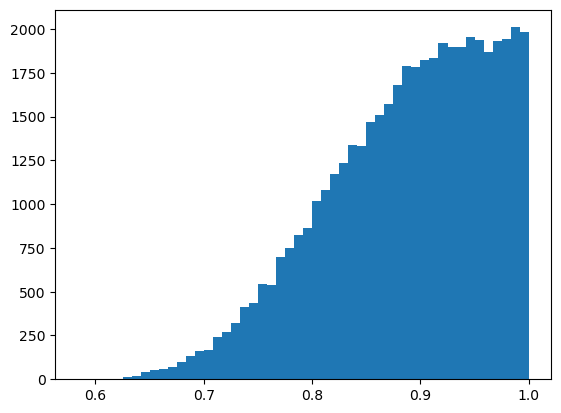

In [111]:
plt.hist(data['PhenomPNRT-LS']['posterior_samples']['mass_ratio'][()], bins=50)

In [82]:
max(data['PhenomPNRT-LS']['priors']['samples']['luminosity_distance'][()])

960.7189550320782

In [40]:
o3dat = h5py.File("../../../O3b/O3bPE/S191109d.h5")

(array([608., 453., 359., 291., 242., 204., 186., 180., 153., 120., 124.,
        117., 112.,  92.,  83.,  85.,  76.,  97.,  63.,  67.,  60.,  57.,
         58.,  70.,  59.,  46.,  61.,  49.,  58.,  43.,  46.,  39.,  42.,
         28.,  38.,  51.,  30.,  35.,  34.,  37.,  33.,  35.,  37.,  26.,
         39.,  31.,  43.,  36.,  40.,  27.]),
 array([0.05001053, 0.06899748, 0.08798443, 0.10697138, 0.12595833,
        0.14494528, 0.16393223, 0.18291918, 0.20190613, 0.22089308,
        0.23988002, 0.25886697, 0.27785392, 0.29684087, 0.31582782,
        0.33481477, 0.35380172, 0.37278867, 0.39177562, 0.41076257,
        0.42974951, 0.44873646, 0.46772341, 0.48671036, 0.50569731,
        0.52468426, 0.54367121, 0.56265816, 0.58164511, 0.60063206,
        0.619619  , 0.63860595, 0.6575929 , 0.67657985, 0.6955668 ,
        0.71455375, 0.7335407 , 0.75252765, 0.7715146 , 0.79050155,
        0.80948849, 0.82847544, 0.84746239, 0.86644934, 0.88543629,
        0.90442324, 0.92341019, 0.94239714, 0.

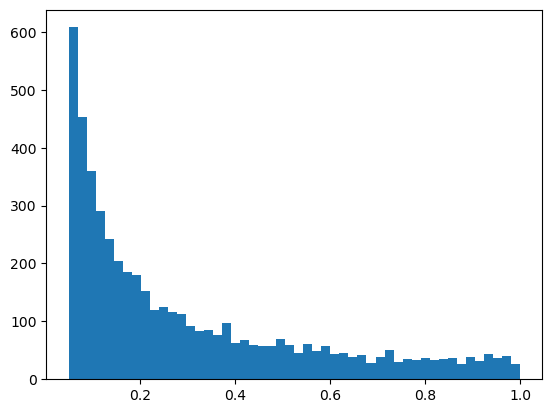

In [54]:
plt.hist(o3dat['C01:IMRPhenomXPHM']['priors']['samples']['mass_ratio'][()], bins=50)